In [127]:
import pandas as pd
import numpy as nd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


import pickle


import warnings
warnings.filterwarnings('ignore')

In [128]:
df = pd.read_csv('Coracao.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [129]:
for i in df.columns:
  if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
    print(f'Tipo da coluna:\n {df[i].dtypes}')  
    print(f'Valores unicos:\n {df[i].unique()}')
    print(f'\nQuantidades de unicos:\n {df[i].nunique()}')
    print(f'\nQuantidades de valores nulos:\n {df[i].isnull().sum()}')
    print(f'\nAnalisando a media:\n {df[i].describe()}')
    print(f'\nQuantidades por opcao:\n {df[i].value_counts().sort_index()}')
    fig = px.box(df,y=df[i])
    fig.show()
  else:
    print(f'Tipo da coluna:\n {df[i].dtypes}')
    print(f'Valores unicos:\n {df[i].unique()}')
    print(f'\nQuantidades de unicos:\n {df[i].nunique()}')
    print(f'\nQuantidades de valores nulos:\n {df[i].isnull().sum()}')
    print(f'\nAnalisando a media:\n {df[i].describe()}')
    print(f'\nQuantidades por opcao:\n {df[i].value_counts().sort_index()}')
    fig1 = px.bar(df,x=df[i])
    fig1.show()  

Tipo da coluna:
 int64
Valores unicos:
 [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

Quantidades de unicos:
 50

Quantidades de valores nulos:
 0

Analisando a media:
 count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

Quantidades por opcao:
 Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64


Tipo da coluna:
 object
Valores unicos:
 ['M' 'F']

Quantidades de unicos:
 2

Quantidades de valores nulos:
 0

Analisando a media:
 count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object

Quantidades por opcao:
 Sex
F    193
M    725
Name: count, dtype: int64


Tipo da coluna:
 object
Valores unicos:
 ['ATA' 'NAP' 'ASY' 'TA']

Quantidades de unicos:
 4

Quantidades de valores nulos:
 0

Analisando a media:
 count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

Quantidades por opcao:
 ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
Name: count, dtype: int64


Tipo da coluna:
 float64
Valores unicos:
 [140.  160.  130.  138.  150.  120.  110.  136.  115.  100.  124.  113.
 125.  145.  112.  132.  118.  170.  142.  190.  135.  180.  108.  155.
 128.  106.   92.  200.  122.   98.  105.  133.   95.   80.  137.  185.
 165.  126.  152.  116.  132.5 144.  154.  134.  104.  139.  131.  141.
 178.  146.  158.  123.  102.   96.  143.  172.  156.  114.  127.  101.
 174.   94.  148.  117.  192.  129.  164. ]

Quantidades de unicos:
 67

Quantidades de valores nulos:
 0

Analisando a media:
 count    918.000000
mean     132.540850
std       17.989932
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

Quantidades por opcao:
 RestingBP
80.0      1
92.0      1
94.0      2
95.0      6
96.0      1
         ..
180.0    12
185.0     1
190.0     2
192.0     1
200.0     4
Name: count, Length: 67, dtype: int64


Tipo da coluna:
 float64
Valores unicos:
 [289.  180.  283.  214.  195.  339.  237.  208.  207.  284.  211.  164.
 204.  234.  273.  196.  201.  248.  267.  223.  184.  288.  215.  209.
 260.  468.  188.  518.  167.  224.  172.  186.  254.  306.  250.  177.
 227.  230.  294.  264.  259.  175.  318.  216.  340.  233.  205.  245.
 194.  270.  213.  365.  342.  253.  277.  202.  297.  225.  246.  412.
 265.  182.  218.  268.  163.  529.  100.  206.  238.  139.  263.  291.
 229.  307.  210.  329.  147.   85.  269.  275.  179.  392.  466.  129.
 241.  255.  276.  282.  338.  160.  156.  272.  240.  393.  161.  228.
 292.  388.  166.  247.  331.  341.  243.  279.  198.  249.  168.  603.
 159.  190.  185.  290.  212.  231.  222.  235.  320.  187.  266.  287.
 404.  312.  251.  328.  285.  280.  192.  193.  308.  219.  257.  132.
 226.  217.  303.  298.  256.  117.  295.  173.  315.  281.  309.  200.
 336.  355.  326.  171.  491.  271.  274.  394.  221.  126.  305.  220.
 242.  347.  344.  358

Tipo da coluna:
 int64
Valores unicos:
 [0 1]

Quantidades de unicos:
 2

Quantidades de valores nulos:
 0

Analisando a media:
 count    918.000000
mean       0.233115
std        0.423046
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64

Quantidades por opcao:
 FastingBS
0    704
1    214
Name: count, dtype: int64


Tipo da coluna:
 object
Valores unicos:
 ['Normal' 'ST' 'LVH']

Quantidades de unicos:
 3

Quantidades de valores nulos:
 0

Analisando a media:
 count        918
unique         3
top       Normal
freq         552
Name: RestingECG, dtype: object

Quantidades por opcao:
 RestingECG
LVH       188
Normal    552
ST        178
Name: count, dtype: int64


Tipo da coluna:
 int64
Valores unicos:
 [172 156  98 108 122 170 142 130 120  99 145 140 137 150 166 165 125 160
 164 138 178 112 118 127 114 154 155  87 148 100 168 184 121 153 134  96
 174 175 144  82 135 115 128 116  94 110  92 180 152 124 106 185 139 190
 146 158 132 176 119 188 162 105  90 136 167 129 102 143 103  91 126  93
 131 149 123 182 141  77 109 133 179 113 104  95  72  97 117  86  63 157
  83  60  70 163  67  78  84 111  80 107 161  69  88  73 159 151 181 186
 177 173 169 171 147  71 192 195 194 187 202]

Quantidades de unicos:
 119

Quantidades de valores nulos:
 0

Analisando a media:
 count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

Quantidades por opcao:
 MaxHR
60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: count, Length: 119, dtype: int64


Tipo da coluna:
 object
Valores unicos:
 ['N' 'Y']

Quantidades de unicos:
 2

Quantidades de valores nulos:
 0

Analisando a media:
 count     918
unique      2
top         N
freq      547
Name: ExerciseAngina, dtype: object

Quantidades por opcao:
 ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


Tipo da coluna:
 float64
Valores unicos:
 [ 0.   1.   1.5  2.   3.   4.   0.5  2.5  5.   0.8  0.7  1.4  2.1  0.4
  0.2  1.7  2.2  0.1  1.6  1.3  0.3  1.8  2.6 -0.9  2.8 -2.6 -1.5 -0.1
  0.9  1.1  2.4 -1.  -1.1 -0.7 -0.8  3.7  1.2 -0.5 -2.   1.9  3.5  0.6
  3.1  2.3  3.4  3.6  4.2  3.2  5.6  3.8  2.9  6.2  4.4]

Quantidades de unicos:
 53

Quantidades de valores nulos:
 0

Analisando a media:
 count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

Quantidades por opcao:
 Oldpeak
-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1     

Tipo da coluna:
 object
Valores unicos:
 ['Up' 'Flat' 'Down']

Quantidades de unicos:
 3

Quantidades de valores nulos:
 0

Analisando a media:
 count      918
unique       3
top       Flat
freq       460
Name: ST_Slope, dtype: object

Quantidades por opcao:
 ST_Slope
Down     63
Flat    460
Up      395
Name: count, dtype: int64


Tipo da coluna:
 int64
Valores unicos:
 [0 1]

Quantidades de unicos:
 2

Quantidades de valores nulos:
 0

Analisando a media:
 count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

Quantidades por opcao:
 HeartDisease
0    410
1    508
Name: count, dtype: int64


In [130]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [131]:
previsores = df.iloc[:,0:11].values
previsores

array([[40, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       [49, 'F', 'NAP', ..., 'N', 1.0, 'Flat'],
       [37, 'M', 'ATA', ..., 'N', 0.0, 'Up'],
       ...,
       [57, 'M', 'ASY', ..., 'Y', 1.2, 'Flat'],
       [57, 'F', 'ATA', ..., 'N', 0.0, 'Flat'],
       [38, 'M', 'NAP', ..., 'N', 0.0, 'Up']], dtype=object)

In [132]:
previsores[:,1] = LabelEncoder().fit_transform(previsores[:,1])
previsores[:,2] = LabelEncoder().fit_transform(previsores[:,2])
previsores[:,6] = LabelEncoder().fit_transform(previsores[:,6])
previsores[:,8] = LabelEncoder().fit_transform(previsores[:,8])
previsores[:,10] = LabelEncoder().fit_transform(previsores[:,10])
previsores

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], dtype=object)

In [133]:
previsores1 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),[1,2,6,8,10])],remainder='passthrough').fit_transform(previsores)
previsores1.shape

(918, 20)

In [134]:
previsores1_esc = StandardScaler().fit_transform(previsores1)
previsores1_escdf = pd.DataFrame(previsores1_esc)
previsores1_escdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,-1.433140,0.414855,0.832653,-0.551341,1.382928,-0.832432
1,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,-0.478484,1.527194,-1.212798,-0.551341,0.754157,0.105664
2,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674,-1.751359,-0.141314,0.720060,-0.551341,-1.525138,-0.832432
3,1.938163,-1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056,-0.584556,0.303621,-0.574767,-0.551341,-1.132156,0.574711
4,-0.515952,0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,0.051881,0.971025,-0.931314,-0.551341,-0.581981,-0.832432


In [135]:
previsores1_escdf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,-7.740117e-18,7.740117e-18,-1.548023e-16,-9.288140e-17,6.192094e-17,7.740117e-18,1.238419e-16,9.288140e-17,0.000000,7.740117e-17,-7.740117e-18,-7.740117e-18,4.644070e-17,-6.192094e-17,-1.238419e-16,-3.483053e-17,-2.058678e-14,5.418082e-17,5.108477e-16,-1.548023e-16
std,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00,1.000545e+00
min,-5.159524e-01,-1.938163e+00,-1.084138e+00,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,-1.228087e+00,-0.490449,-1.214246e+00,-8.235563e-01,-2.714484e-01,-1.002181e+00,-8.690559e-01,-2.706015e+00,-2.922162e+00,-2.995530e+00,-5.513413e-01,-3.018469e+00,-3.271482e+00
25%,-5.159524e-01,5.159524e-01,-1.084138e+00,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,-1.228087e+00,-0.490449,-1.214246e+00,-8.235563e-01,-2.714484e-01,-1.002181e+00,-8.690559e-01,-6.906294e-01,-6.974838e-01,-5.747672e-01,-5.513413e-01,-6.605778e-01,-8.324324e-01
50%,-5.159524e-01,5.159524e-01,9.223917e-01,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,8.142748e-01,-0.490449,8.235563e-01,-8.235563e-01,-2.714484e-01,9.978237e-01,-8.690559e-01,5.188098e-02,-1.413143e-01,-5.396645e-04,-5.513413e-01,4.678968e-02,-2.695748e-01
75%,-5.159524e-01,5.159524e-01,9.223917e-01,-4.818867e-01,-5.328378e-01,-2.296787e-01,-5.074783e-01,8.142748e-01,-0.490449,8.235563e-01,1.214246e+00,-2.714484e-01,9.978237e-01,1.150674e+00,6.883185e-01,4.148552e-01,4.198099e-01,-5.513413e-01,7.541571e-01,5.747115e-01
max,1.938163e+00,5.159524e-01,9.223917e-01,2.075177e+00,1.876744e+00,4.353909e+00,1.970528e+00,8.142748e-01,2.038947,8.235563e-01,1.214246e+00,3.683942e+00,9.978237e-01,1.150674e+00,2.491558e+00,3.751872e+00,6.725053e+00,1.813758e+00,2.561874e+00,4.983762e+00


In [136]:
alvo = df.iloc[:,11]

In [137]:
lda = LinearDiscriminantAnalysis(n_components = 1)

In [138]:
previsores_lda = lda.fit_transform(previsores1,alvo)
previsores_lda

array([[-2.01691598e+00],
       [-9.10848586e-01],
       [-1.71881862e+00],
       [ 8.38721865e-01],
       [-1.64922538e+00],
       [-1.80954079e+00],
       [-2.76421587e+00],
       [-1.86205800e+00],
       [ 1.37237620e+00],
       [-2.46978684e+00],
       [-2.61043961e+00],
       [ 6.99005542e-01],
       [-2.02122532e+00],
       [ 1.38975962e+00],
       [-2.51516396e+00],
       [-7.79873716e-01],
       [ 4.40346416e-01],
       [-2.80762116e+00],
       [ 1.06029203e+00],
       [ 3.99120978e-03],
       [-2.38999614e+00],
       [-3.03772423e-01],
       [-2.74673305e+00],
       [ 6.60481808e-01],
       [-1.82292427e+00],
       [-2.03401755e+00],
       [ 1.95737626e+00],
       [-1.68612330e+00],
       [-2.22081930e+00],
       [-1.92782443e+00],
       [ 2.19121179e-01],
       [-1.63242588e+00],
       [ 1.16302671e+00],
       [ 9.69209747e-01],
       [-2.78063758e+00],
       [-2.06609100e+00],
       [ 2.57222434e+00],
       [-2.64243482e+00],
       [-2.0

In [139]:
lda.explained_variance_ratio_

array([1.])

Preparando base de treino e de teste

In [140]:
x_treino, x_teste, y_treino,y_teste = train_test_split(previsores1_esc,alvo,test_size=0.2,random_state=0)

In [141]:
x_treino.shape

(734, 20)

In [142]:
x_teste.shape

(184, 20)

In [143]:
y_treino.shape

(734,)

In [144]:
y_teste.shape

(184,)

     Modelos de Sklearn
     

In [154]:
models = {
    'naive': GaussianNB(),
    'svc': SVC(kernel='rbf', random_state=1, C=2)}

def treino_teste(models, x_teste, y_teste, x_treino, y_treino):
    modelos_score = {}

    for nome, model in models.items():
        model.fit(x_treino, y_treino)
        
        resultado = model.score(x_teste, y_teste) * 100

        # Corrigindo o formato da string
        resultado1 = '{:.2f}%'.format(resultado)

        modelos_score[nome] = resultado1

    return modelos_score

treino_teste(models=models,x_teste=x_teste,y_teste=y_teste,x_treino=x_treino,y_treino=y_treino)

{'naive': '83.15%', 'svc': '84.78%'}

Função para rodar os modelos

In [146]:
def predição(modelo,dados,dados1):
    previsor = modelo.predict(dados)
    print('\n Acurácia: %.2f%%'%(accuracy_score(dados1,previsor)*100))
    sns.set(font_scale=1.0)
    fig, ax = plt.subplots(figsize=(2,2))
    plt.title('Matriz de confusão')
    ax = sns.heatmap(confusion_matrix(dados1,previsor),annot=True,cbar=False)
    plt.xlabel('Rótolos verdadeiros')
    plt.ylabel('Rótulos previstos')
    print(f'\nClassificação: \n{classification_report(dados1,previsor)}')

Função para Validação cruzada

In [147]:
def validacao_cruzada(modelo,base):
    kf = KFold(n_splits=30,shuffle=True,random_state=5)

    mod = modelo

    resul = cross_val_score(mod,previsores1,alvo,cv=kf)

    print('Acurácia Média: %.2f%%'%(resul.mean()*100.0))

Analisando o modelo Naive bayes


 Acurácia: 83.15%

Classificação: 
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        77
           1       0.85      0.87      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



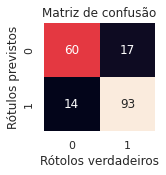

In [148]:
predição(modelo=models['naive'],dados=x_teste,dados1=y_teste)  

Analisando modelo naive bayes de treino


 Acurácia: 85.97%

Classificação: 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       333
           1       0.87      0.87      0.87       401

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734



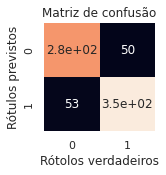

In [149]:
predição(modelo=models['naive'],dados=x_treino,dados1=y_treino)

Validação cruzada Naive Bayes

In [150]:
validacao_cruzada(modelo=models['naive'],base=previsores1_esc)

Acurácia Média: 85.05%



Analisando o modelo SVC de teste


 Acurácia: 84.78%

Classificação: 
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        77
           1       0.84      0.91      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



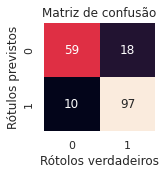

In [151]:
predição(modelo=models['svc'],dados=x_teste,dados1=y_teste)

Analisando o modelo SVC de treino


 Acurácia: 92.51%

Classificação: 
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       333
           1       0.91      0.96      0.93       401

    accuracy                           0.93       734
   macro avg       0.93      0.92      0.92       734
weighted avg       0.93      0.93      0.92       734



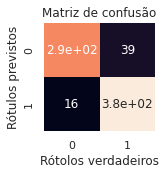

In [152]:
predição(modelo=models['svc'],dados=x_treino,dados1=y_treino)

Validação cruzada SVC

In [153]:
validacao_cruzada(modelo=models['svc'],base=previsores1_esc)

Acurácia Média: 69.94%


Acurácia treino